# Analyse de la structure de bande du KHS

In [8]:
#importation du CIF et des packages nécessaires
import numpy as np
import matplotlib.image as mpimg
import scipy.constants as const
import matplotlib.pyplot as plt
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure.plotter import BSPlotter
with MPRester("im80MbCif8QDmhc2y") as m:
    
    structure = m.get_structure_by_material_id("mp-38011")
    
    bstruct= m.get_bandstructure_by_material_id("mp-38011") #structure de bande du matériaux
    

Nous allons commencer par afficher le graphe de la dispersion de phonon du matériau pour avoir une première vue d'ensemble

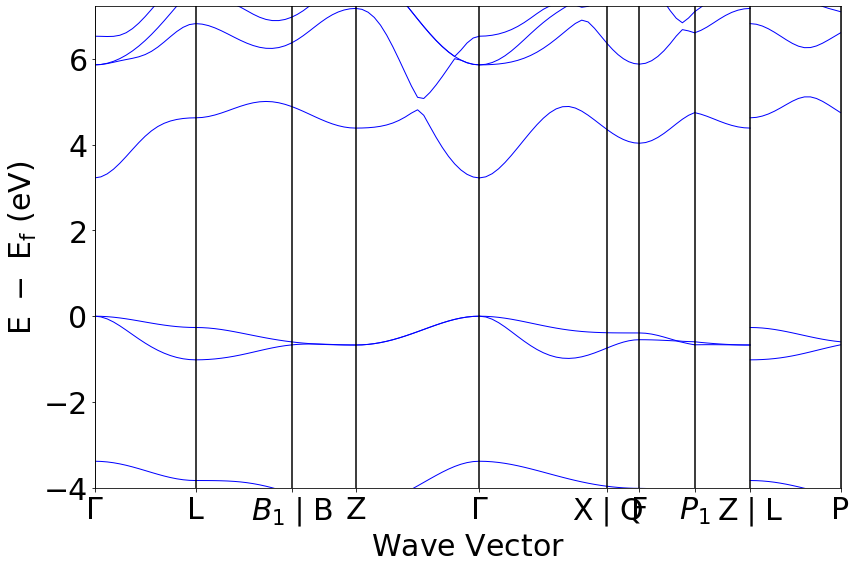

In [9]:
bsp = BSPlotter(bstruct)
bsp.show()

# Analyse de la bande interdite

In [10]:
bint=bstruct.get_band_gap()
print(bint)

{'direct': True, 'energy': 3.2247999999999997, 'transition': '\\Gamma-\\Gamma'}


L'énergie de cette bande est de 3.2247 eV, la transition des électrons se fait du point de vecteur d'onde Gamma au point de vecteur d'onde Gamme. En effet, comme le maximum de la dernière bande de valence est aligné avec le minimum de la première bande de conduction, la bande interdite est donc directe.
Sur le graphe suivant (issu du material project : https://materialsproject.org/materials/mp-38011/) on constate bien la présence de ce fameux alignement qui fait que la bande est directe


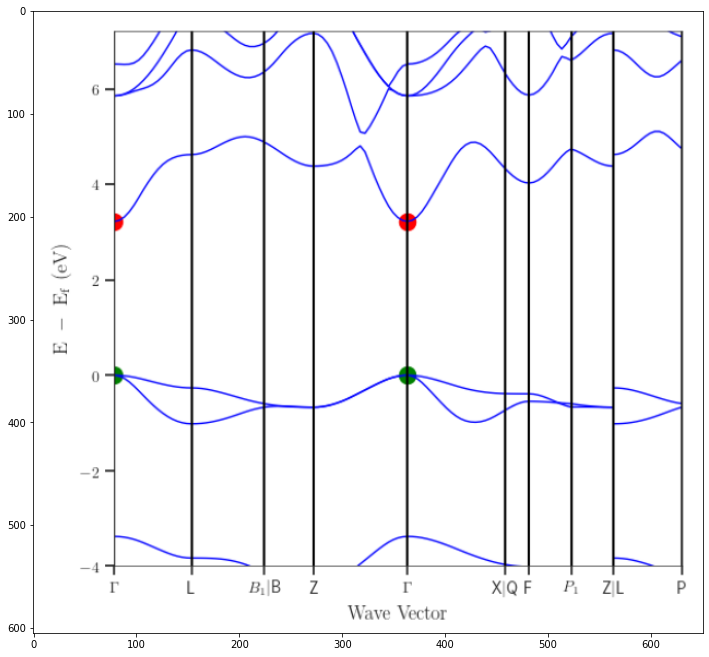

In [11]:
plt.figure(figsize = (12,12))
plt.imshow(mpimg.imread('Capture1.PNG'))
plt.show()

# Analyse de la dispersion

### 1. Bande de valence

In [12]:

V_ord = bsp.bs_plot_data().get('energy') 
V_abs = bsp.bs_plot_data().get('distances')
V_index = bstruct.get_vbm().get('band_index')
print(V_index)

p_min = 100
p_max = 0
br_min = 0
br_max = 0


for k in range(0, len(V_abs)):
    distI = V_abs[k][0]
    distF = V_abs[k][-1]
    enI = V_ord[k]['1'][7][0]
    enF = V_ord[k]['1'][7][-1]
    p = (enF-enI)/(distF-distI)
    p_abs = abs(p)
    
    if p_abs<p_min:
        br_min = k
        p_min = p_abs
    
    if p_abs>p_max:
        br_max = k
        p_max = p_abs
    

print('Bande de valence : direction avec le plus de dispersion = ', p_max)
print('Bande de valence : direction avec le moins de dispersion = ', p_min)



defaultdict(<class 'list'>, {<Spin.up: 1>: [6, 7]})
Bande de valence : direction avec le plus de dispersion =  0.6952738499667588
Bande de valence : direction avec le moins de dispersion =  0.018727719549577217


### 2.Bande de conduction

In [13]:
C_ord = bsp.bs_plot_data().get('energy') 
C_abs = bsp.bs_plot_data().get('distances')
C_index = bstruct.get_cbm().get('band_index')
print(C_index)

Cp_min = 100
Cp_max = 0
Cbr_min = 0
Cbr_max = 0


for k in range(0, len(C_abs)):
    distI = C_abs[k][0]
    distF = C_abs[k][-1]
    enI = C_ord[k]['1'][8][0]
    enF = C_ord[k]['1'][8][-1]
    p = (enF-enI)/(distF-distI)
    p_abs = abs(p)
    
    if p_abs<Cp_min:
        Cbr_min = k
        Cp_min = p_abs
    
    if p_abs>Cp_max:
        Cbr_max = k
        Cp_max = p_abs
    


print('Bande de conduction : direction avec le plus de dispersion = ', Cp_max)
print('\n Bande de conduction : direction avec le moins de dispersion = ', Cp_min)

defaultdict(<class 'list'>, {<Spin.up: 1>: [8]})
Bande de conduction : direction avec le plus de dispersion =  1.7730257917324537

 Bande de conduction : direction avec le moins de dispersion =  0.17095370815972594


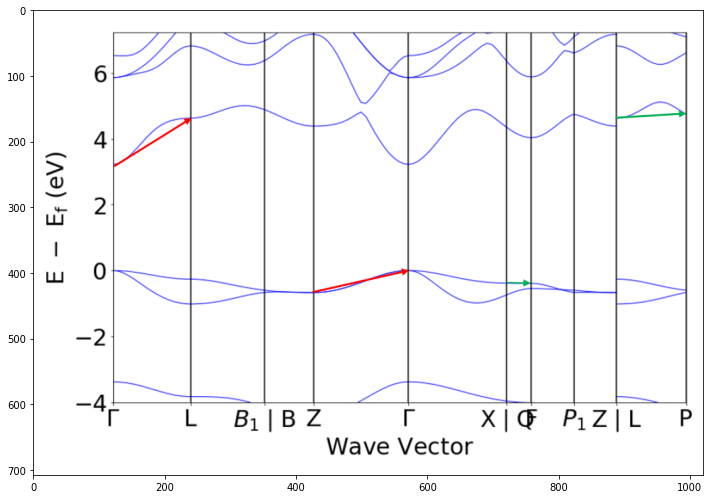

In [14]:
plt.figure(figsize = (12,12))
plt.imshow(mpimg.imread('Capture.PNG'))
plt.show()

# Masse effective

La masse effective peut se calculer au moyen de l'équation suivante :  $\frac{\partial^2 E}{\partial k^2} = \frac{\hbar^2}{m^*} $
Néanmoins, nous allons ici la calculer au voisinage d'un maximum ou d'un minimum de bande, l'équation peut alors s'écrire $E($k$) - E_0 =  \pm \frac{\hbar^2}{2m^*} (k_1^2+k_2^2+k_3^2)$

Par contre, la norme du vecteur d'onde s'avère être nulle dans notre cas, nous allons donc plutôt utiliser un vecteur du réseau réciproque pour pallier à ça puisque le réseau est périodique et ainsi pouvoir tout de même utiliser la formule ci-dessus.



### Constantes utiles

In [15]:
hbar = const.hbar #en J*s
eV = const.physical_constants['electron volt'][0]
hbarev = hbar/eV #h barre en eV


### Bande de valence

In [16]:
bv_max_en = bstruct.get_vbm()['energy'] #energie du point maximum de la dernière bande de valence

vect_recip = 2*np.pi/4.356711732885366 #norme d'un vecteur du reseau reciproque (le denominateur est la longeur du vecteur de base a)

masseEff1 = hbarev**2*vect_recip**2/(2*bv_max_en)

print('Pour une dispersion parabolique, la masse effective au sommet de la derniere bande de valence est ' + str(masseEff1) + 'kg')

Pour une dispersion parabolique, la masse effective au sommet de la derniere bande de valence est -8.200776388784664e-31kg


### Bande de conduction

In [17]:
bc_max_en = bstruct.get_cbm()['energy'] #energie du point maximum de la pemiere bande de conduction

masseEff2 = hbarev**2*vect_recip**2/(2*bc_max_en)

print('Pour une dispersion parabolique, la masse effective au sommet de la première bande de conduction est ' + str(masseEff2) + 'kg')

Pour une dispersion parabolique, la masse effective au sommet de la première bande de conduction est 1.6840496927555861e-31kg


# Références : 

matérial project ( https://materialsproject.org/materials/mp-38011/ )